In [16]:
import testing as tst
import impute as imp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [116]:
nombres_sarima=['tiempo','Direct','Global','Temperatura','Humedad','Presion','ws','wd','alturasolar','azimuth']
inputs=['time','Direct','Global','Temperatura','Humedad','ws','wd','P','Eg']
nombres_ann=['tiempo','Direct','Global','Difusa','Temperatura','Humedad','Presion']
# nombres_ann=['tiempo','#','Direct','Global','Temperatura','Humedad','Presion','ws','wd','alturasolar','azimuth']
# sarima_2018=pd.read_csv('../../01_weather_data/03_imputing_process/02_imputed_data/Tmx_SARIMA_0_1_1_multioneshot.csv',index_col=0,parse_dates=True,skiprows=1,names=nombres_sarima)
sarima_2018=pd.read_csv('../../01_weather_data/03_imputing_process/02_imputed_data/Tmx_SARIMA_0_1_0_0_1_1_multioneshot.csv',index_col=0,parse_dates=True,skiprows=1,names=nombres_sarima)
tmx_2018=pd.read_csv('../../01_weather_data/03_imputing_process/01_test_data/tmx_base_2018_solar_angles.csv',index_col=0,parse_dates=True,names=nombres_sarima,skiprows=1)
ann_2018=pd.read_csv('../../01_weather_data/03_imputing_process/02_imputed_data/CNN-LSTM_test_data.csv',index_col=0,parse_dates=True,names=nombres_ann,skiprows=1)#('CNN-LSTM_test_data.csv',index_col=0,parse_dates=True,names=nombres_ann,skiprows=1)
yearly_sarima,daily_sarima,hourly_sarima=tst.dfmetricas(sarima_2018,tmx_2018,'SARIMA(0,1,1)')

In [117]:
yearly_sarima,daily_sarima,hourly_sarima=tst.dfmetricas(sarima_2018,tmx_2018,'SARIMA(0,1,1)')
yearly_sarima2,daily_sarima2,hourly_sarima2=tst.dfmetricas(sarima_2_2018,tmx_2018,'SARIMA(0,1,0)(0,1,1)')
yearly_ann,daily_ann,hourly_ann=tst.dfmetricas(ann_2018,tmx_2018,'CNN-LSTM')
# yearly_,daily_,hourly_=tst.dfmetricas(_2018,tmx_2018,'SARIMA(')
metricas=['model','E_dmae','E_dmape','mae_Ig']
df_metrics=pd.concat((yearly_ann[metricas],yearly_sarima[metricas],yearly_sarima2),ignore_index=True)
df_metrics[metricas]

,model,E_dmae,E_dmape,mae_Ig
0,CNN-LSTM,530.044127,11.204879,76.355088
1,"SARIMA(0,1,1)",606.641714,12.130787,86.432810
2,"SARIMA(0,1,0)(0,1,1)",606.641714,12.130787,86.432810


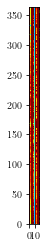

In [118]:
imshow=plt.imshow(daily_ann,cmap='jet',vmin=0,vmax=120,alpha=1,aspect='equal',origin='lower',)

In [119]:
hourly_ann.to_csv('../../01_weather_data/03_imputing_process/ann_me.csv')
# hourly_sarima.to_csv('../../01_weather_data/03_imputing_process/sarima_me.csv')
hourly_sarima.to_csv('../../01_weather_data/03_imputing_process/sarima2_me.csv')

/var/folders/7n/c_cvng9j735c5pvm2v5k2tdh0000gp/T/ipykernel_1231/3965706945.py:17: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(imshow,label='$I_g^{mae}[\dfrac{W}{m^2}]$')
/var/folders/7n/c_cvng9j735c5pvm2v5k2tdh0000gp/T/ipykernel_1231/3965706945.py:26: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(imshow,label='$I_g^{mae}[\dfrac{W}{m^2}]$')
/var/folders/7n/c_cvng9j735c5pvm2v5k2tdh0000gp/T/ipykernel_1231/3965706945.py:36: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current

(<Figure size 417.6x93.6 with 2 Axes>, array([<AxesSubplot:>], dtype=object))

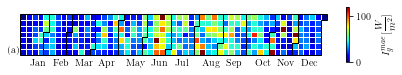

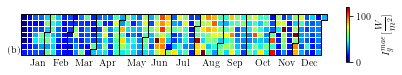

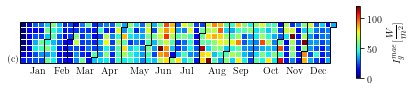

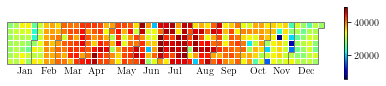

In [131]:
import calplot 

left, width = -1.3, -.2
right1=left+width
bottom, height = -.15, .25
top1 = bottom + height

left, width = -.25, .2
right2=left+width
bottom, height = -.15, .25
top2 = bottom + height

calplotsize=(5.8,1.3)
path_figures='../../../Tesis_repo/figures/'
calplot.calplot(daily_ann['mae'],yearlabels=False,dayticks=False,cmap='jet',how='mean',
                vmin=0,vmax=120,edgecolor='black',linewidth=1,figsize=calplotsize,colorbar=False)
plt.colorbar(imshow,label='$I_g^{mae}[\dfrac{W}{m^2}]$')
plt.text(right2, top2, '(a)',
        horizontalalignment='right',
        verticalalignment='bottom',)
plt.tight_layout()
# plt.savefig(path_figures+'testyear_ann.pdf')
#         transform=axs[1].transAxes)
calplot.calplot(daily_sarima['mae'],yearlabels=False,dayticks=False,cmap='jet',how='mean',
                vmin=0,vmax=120,edgecolor='black',linewidth=1,figsize=calplotsize,colorbar=False)
plt.colorbar(imshow,label='$I_g^{mae}[\dfrac{W}{m^2}]$')
plt.text(right2, top2, '(b)',
        horizontalalignment='right',
        verticalalignment='bottom',)

#         transform=axs[1].transAxes)
plt.tight_layout()
plt.savefig(path_figures+'testyear_sarima.pdf')
calplot.calplot(daily_sarima2['mae'],yearlabels=False,dayticks=False,cmap='jet',how='mean',
                vmin=0,vmax=120,edgecolor='black',linewidth=1,figsize=calplotsize,colorbar=False)
plt.colorbar(imshow,label='$I_g^{mae}[\dfrac{W}{m^2}]$')
plt.text(right2, top2, '(c)',
        horizontalalignment='right',
        verticalalignment='bottom',)
calplot.calplot(tmx_2018['Global'],how='sum',cmap='jet',figsize=calplotsize,yearlabels=False,dayticks=False)


In [121]:
# days_mae=['2018-01-30', #maximo
# '2018-01-12', #minimo
# '2018-06-15',
# '2018-04-17',
# '2018-08-12',
# '2018-07-19',
# '2018-11-14',
# '2018-12-21',]
ms=[]
# day=0
# for day in range(0,8,1):
measured=np.stack(tmx_2018.Global)
predicted_ann=np.stack(ann_2018.Global)
predicted_sarima=np.stack(sarima_2018.Global)
reg_ann = LinearRegression(fit_intercept=True).fit(measured.reshape(-1,1),predicted_ann)
b_ann=reg_ann.intercept_
m_ann=reg_ann.coef_
reg_sarima = LinearRegression(fit_intercept=True).fit(measured.reshape(-1,1),predicted_sarima)
b_sarima=reg_sarima.intercept_
m_sarima=reg_sarima.coef_
ms.append(str(m_ann).replace('[','').replace(']',''))
ms.append(str(m_sarima).replace('[','').replace(']',''))
# np.array(m_ann,m_sarima)
# reg.fit()
# print(days_mae[day])
print('m_ann:',m_ann)
print('b_ann:',b_ann)
    
    

m_ann: [0.95530854]
b_ann: 16.373481677772332


In [122]:
print('m_ann:',m_ann)
print('b_ann:',b_ann)
print('m_sarima',m_sarima)
print('b_sarima',b_sarima)
x = np.linspace(1,1200)
y = 1 * x 
y_ann = m_ann * x +b_ann
y_sarima = m_sarima * x +b_sarima


m_ann: [0.95530854]
b_ann: 16.373481677772332
m_sarima [0.94031851]
b_sarima 14.403883690521127


In [123]:
r2s=[]
predict_ann = LinearRegression(fit_intercept=True).fit(measured.reshape(-1,1),predicted_ann).predict(measured.reshape(-1,1))
# reg_ols = LinearRegression()
# y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_ann = metrics.r2_score(predicted_ann,predict_ann)
predict_sarima = LinearRegression(fit_intercept=True).fit(measured.reshape(-1,1),predicted_sarima).predict(measured.reshape(-1,1))
# reg_ols = LinearRegression()
# y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_sarima = metrics.r2_score(predicted_sarima,predict_sarima)
r2s.append(r2_ann)
r2s.append(r2_sarima)
print("ann R2 score", r2_ann)
print("SARIMA R2 score", r2_sarima)

ann R2 score 0.9387569195730642
SARIMA R2 score 0.9267820870085264


In [124]:
days_mae=['2018-01-30', #maximo
'2018-01-12', #minimo
'2018-06-15',
'2018-04-17',
'2018-08-12',
'2018-07-19',
'2018-11-14',
'2018-12-21',]
ann_2018.Global.loc[days_mae[0]]

tiempo
2018-01-30 00:00:00    0.0
2018-01-30 00:10:00    0.0
2018-01-30 00:20:00    0.0
2018-01-30 00:30:00    0.0
2018-01-30 00:40:00    0.0
                      ... 
2018-01-30 23:10:00    0.0
2018-01-30 23:20:00    0.0
2018-01-30 23:30:00    0.0
2018-01-30 23:40:00    0.0
2018-01-30 23:50:00    0.0
Name: Global, Length: 144, dtype: float64

In [125]:
params={'text.latex.preamble':'\\usepackage{lmodern,amsmath}',
       'text.usetex':True,
       'font.size':10,
       'font.family':'lmodern'}
# h_fmt=mdates.DateFormatter('%m-%d-%H')
plt.rcParams.update(params)

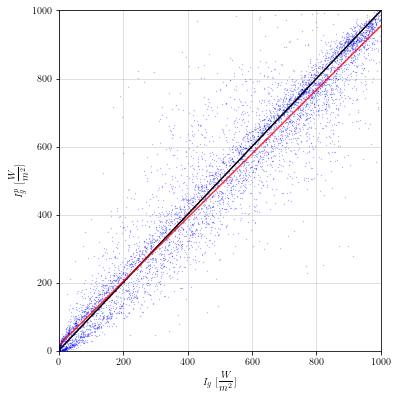

In [126]:
fig, ax=plt.subplots(figsize=(5.63,5.63))
ax.plot(measured[0:90*144],predicted_sarima[0:90*144],'b.',markersize=.5,alpha=.5) #markersize=.25
plt.plot(x,y,'k',linewidth=1.5)
plt.plot(x,y_sarima,'r',linewidth=1.5,alpha=.8)
ax.set_ylabel('$I_g^p$ $[\dfrac{W}{m^2}$]')
ax.set_xlabel('$I_g$ $[\dfrac{W}{m^2}$]')
ax.set_ylim(0,1000)
ax.set_xlim(0,1000)
ax.grid(alpha=.5)
plt.tight_layout()
# plt.savefig(path_figures+'linreg_sarima.png')


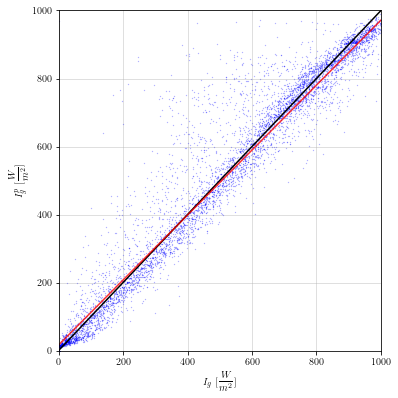

In [127]:
fig, ax=plt.subplots(figsize=(5.63,5.63))
# ax.plot(measured,predicted_sarima,'b.',markersize=.1)
# plt.scatter(measured,predicted_sarima)
ax.plot(measured[0:90*144],predicted_ann[0:90*144],'b.',markersize=.5,alpha=.5)
plt.plot(x,y,'k',linewidth=1.5,alpha=1)
plt.plot(x,y_ann,'r',linewidth=1.5,alpha=.8)


plt.grid(alpha=.5)

ax.set_ylabel('$I_g^p$ $[\dfrac{W}{m^2}$]')
ax.set_xlabel('$I_g$ $[\dfrac{W}{m^2}$]')
ax.set_ylim(0,1000)
ax.set_xlim(0,1000)
plt.tight_layout()
# plt.savefig(path_figures+'linreg_ann.png')
# plt.plot(ann_2018.Global)
# plt.plot(sarima_2018.Global)
# reg = LinearRegression().fit(X, y)

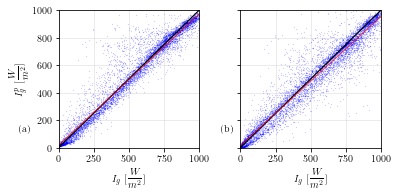

In [128]:
left, width = -.4, .2
right1=left+width
bottom, height = -.15, .25
top1 = bottom + height

left, width = -.25, .2
right2=left+width
bottom, height = -.15, .25
top2 = bottom + height





size=(5.63,5.63/2)
fig,axs =plt.subplots(1,2, figsize=size,sharey=True)
axs[0].plot(measured[0:90*144],predicted_ann[0:90*144],'b.',markersize=.28,alpha=.5)
axs[0].plot(x,y,'k',linewidth=1.2,alpha=1)
axs[0].plot(x,y_ann,'r',linewidth=1,alpha=.7)
axs[0].grid(alpha=.3)
axs[0].set_ylim(0,1000)
axs[0].set_xlim(0,1000)
axs[0].set_xlabel('$I_g$ $[\dfrac{W}{m^2}$]')
axs[0].text(right1, top1, '(a)',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=axs[0].transAxes)
axs[1].plot(measured[0:90*144],predicted_sarima[0:90*144],'b.',markersize=.28,alpha=.5)
axs[1].plot(x,y,'k',linewidth=1.2,alpha=1)
axs[1].plot(x,y_sarima,'r',linewidth=1,alpha=.7)
axs[1].grid(alpha=.3)
axs[1].set_ylim(0,1000)
axs[1].set_xlim(0,1000)
axs[1].set_xlabel('$I_g$ $[\dfrac{W}{m^2}$]')
axs[0].set_ylabel('$I_g^p$ $[\dfrac{W}{m^2}$]')
axs[1].text(right2, top2, '(b)',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=axs[1].transAxes)
plt.tight_layout()
plt.savefig(path_figures+'linreg.jpg',dpi=200)

In [129]:
def typical_error_day(dfrad):
    dfmingroup=dfrad.groupby(['minutodia',pd.Grouper(freq='1H')]).mean()
    dfmindia=dfmingroup.groupby(pd.Grouper(level='minutodia',axis=0)).mean()
    meanaltura=dfmindia.alturasolar.mean()
    meandiay=dfmindia.me.mean()
    return(dfmindia.mae,dfmindia.me)

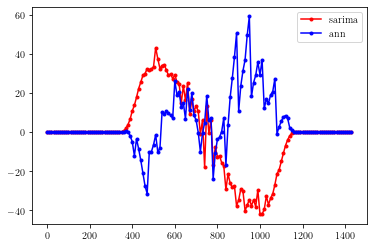

In [130]:
mae_sarima,me_sarima=typical_error_day(hourly_sarima)
mae_ann,me_ann=typical_error_day(hourly_ann)
plt.plot(me_sarima,'r.-',label='sarima')
plt.plot(me_ann,'b.-',label='ann')
plt.legend()

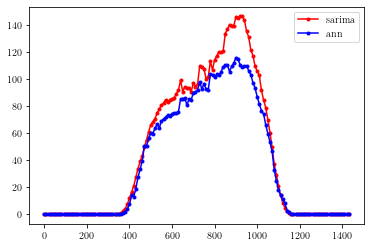

In [72]:
plt.plot(mae_sarima,'r.-',label='sarima')
plt.plot(mae_ann,'b.-',label='ann')
plt.legend()

In [133]:

metricas=['model','E_dmae','E_dmape','mae_Ig','$m$','$R^2$']
dfr2s=pd.DataFrame((r2s),columns=['$R^2$'])
dfms=pd.DataFrame((ms),columns=['$m$'])
linreg=pd.concat((dfms,dfr2s),axis=1)
df_allmetrics=pd.concat((df_metrics,linreg),axis=1)
df_allmetrics[metricas]

,model,E_dmae,E_dmape,mae_Ig,$m$,$R^2$
0,CNN-LSTM,530.044127,11.204879,76.355088,0.95530854,0.938757
1,"SARIMA(0,1,1)",606.641714,12.130787,86.432810,0.94031851,0.926782
2,"SARIMA(0,1,0)(0,1,1)",606.641714,12.130787,86.432810,NaN,NaN
